In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from textwrap import wrap
import ast
import itertools
import collections
import seaborn as sns

### Simple EDA

In [4]:
df = pd.read_csv("india-v1-preprocessed-19000-38000.csv")

In [5]:
df

Unnamed: 0                                               Text  \
0           19000  well this is no surprise, i spoke about this j...   
1           19001                        faqs about #covid #vaccines   
2           19002  4 dose vaccine against covid thanks doctor tha...   
3           19003  india's fight against covid-19 is getting stro...   
4           19004  #justasking #covid #precautiondose is there an...   
...           ...                                                ...   
18995       37995  i am afraid that infection will not spread whi...   
18996       37996  wait is now over: delhi, gujarat, tamil nadu r...   
18997       37997  i think, modi ji k paas issbar 26 january pr d...   
18998       37998  first #consignment #covid-19 vaccine, #covishi...   
18999       37999  very good news assam finally covid vaccine is ...   

                                                new_text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                     languages  \
0                      ENGLISH   
1                      Unknown   
2               ENGLISH, KHMER   
3                      ENGLISH   
4                      ENGLISH   
...                        ...   
18995                  ENGLISH   
18996                  ENGLISH   
18997  Unknown, HINDI, Unknown   
18998                  ENGLISH   
18999                  ENGLISH   

                                              translated  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                 new_languages  \
0                      ENGLISH   
1                      Unknown   
2                      ENGLISH   
3                      ENGLISH   
4                      ENGLISH   
...                        ...   
18995                  ENGLISH   
18996                  ENGLISH   
18997  Unknown, HINDI, Unknown   
18998                  ENGLISH   
18999                  ENGLISH   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                     words_processed_all  \
0      ['well', 'surprise', 'speak', 'journalist', 'b...   
1                            ['fan', 'cou

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Unnamed: 0                         19000 non-null  int64 
 1   Text                               19000 non-null  object
 2   new_text                           19000 non-null  object
 3   languages                          19000 non-null  object
 4   translated                         19000 non-null  object
 5   new_languages                      19000 non-null  object
 6   pos_tagged_words                   19000 non-null  object
 7   words_processed_all                19000 non-null  object
 8   words_processed_noun_adj_verb_adv  19000 non-null  object
 9   words_processed_noun               19000 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.4+ MB


In [7]:
df[df.duplicated()==True]

Empty DataFrame
Columns: [Unnamed: 0, Text, new_text, languages, translated, new_languages, pos_tagged_words, words_processed_all, words_processed_noun_adj_verb_adv, words_processed_noun]
Index: []

In [8]:
df.describe()

Unnamed: 0
count  19000.000000
mean   28499.500000
std     5484.971893
min    19000.000000
25%    23749.750000
50%    28499.500000
75%    33249.250000
max    37999.000000

In [9]:
df.dtypes

Unnamed: 0                            int64
Text                                 object
new_text                             object
languages                            object
translated                           object
new_languages                        object
pos_tagged_words                     object
words_processed_all                  object
words_processed_noun_adj_verb_adv    object
words_processed_noun                 object
dtype: object

In [10]:
df.head()

Unnamed: 0                                               Text  \
0       19000  well this is no surprise, i spoke about this j...   
1       19001                        faqs about #covid #vaccines   
2       19002  4 dose vaccine against covid thanks doctor tha...   
3       19003  india's fight against covid-19 is getting stro...   
4       19004  #justasking #covid #precautiondose is there an...   

                                            new_text       languages  \
0  well this is no surprise, i spoke about this j...         ENGLISH   
1                        faqs about #covid #vaccines         Unknown   
2  4 dose vaccine against covid thanks doctor tha...  ENGLISH, KHMER   
3  india's fight against covid-19 is getting stro...         ENGLISH   
4  #justasking #covid #precautiondose is there an...         ENGLISH   

                                          translated new_languages  \
0  well this is no surprise, i spoke about this j...       ENGLISH   
1                        faqs about #covid #vaccines       Unknown   
2  4 dose vaccine against covid thanks doctor tha...       ENGLISH   
3  india's fight against covid-19 is getting stro...       ENGLISH   
4  #justasking #covid #precautiondose is there an...       ENGLISH   

                                    pos_tagged_words  \
0  [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1  [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2  [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3  [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4  [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   

                                 words_processed_all  \
0  ['well', 'surprise', 'speak', 'journalist', 'b...   
1                        ['fan', 'couid', 'vaccine']   
2  ['four', 'dose', 'vaccine', 'couid', 'thank', ...   
3  ['india', 'fight', 'couid', 'nineteen', 'get',...   
4  ['justjoke', 'couid', 'precautiondose', 'scien...   

                   words_processed_noun_adj_verb_adv  \
0  ['surprise', 'speak', 'journalist', 'come', 'n...   
1                        ['fan', 'couid', 'vaccine']   
2  ['dose', 'vaccine', 'couid', 'thank', 'doctor'...   
3  ['fight', 'couid', 'get', 'strong', 'crore', '...   
4  ['justjoke', 'couid', 'precautiondose', 'scien...   

                                words_processed_noun  
0  ['surprise', 'journalist', 'number', 'other', ...  
1                                 ['fan', 'vaccine']  
2  ['dose', 'vaccine', 'thank', 'doctor', 'thank'...  
3  ['fight', 'warrior', 'est', 'dose', 'vaccine',...  
4  ['confirmation', 'evidence', 'ord', 'booster',...

### Sentence Length Distribution

In [11]:
sns.set(rc = {'figure.figsize':(6,6)})

Max length: 939, Min length: 9, Average Length :  198.3247894736842


<AxesSubplot:>

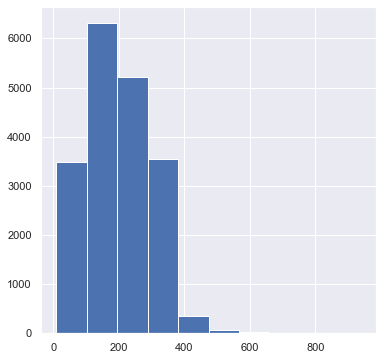

In [12]:
#sentence length distribution
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(df['Text'].str.len()),min(df['Text'].str.len()),df['Text'].str.len().mean()))
df['Text'].str.len().hist()

### Word Count

In [15]:
#Review word count: Just to get a simple sensing of the word count in the reviews
word_count = []
for each in df["pos_tagged_words"]:
    words_list = each.split(" ")
    word_count.append(len(words_list))
df["word_count"] = word_count

In [16]:
df.head()

Text  \
0  vaccinated, rainbow, #, vaccinated, #, covidva...   
1  very, unfortunate, situation, ., following, st...   
2  statement, by, stating, all, australians, can,...   
3  true, dat, ., but, also, chances, that, many, ...   
4  before, :, couid, -, nineteen, vaccines, got, ...   

                                    pos_tagged_words  \
0  [('vaccinated', 'VBN'), ('rainbow', 'NN'), ('v...   
1  [('very', 'RB'), ('unfortunate', 'JJ'), ('situ...   
2  [('statement', 'NN'), ('by', 'IN'), ('stating'...   
3  [('true', 'JJ'), ('dat', 'NN'), ('but', 'CC'),...   
4  [('before', 'IN'), ('couid', 'NN'), ('nineteen...   

                                 words_processed_all  \
0  ['vaccinated', 'rainbow', 'vaccinated', 'covid...   
1  ['unfortunate', 'situation', 'following', 'sto...   
2  ['statement', 'stating', 'australian', 'vaccin...   
3  ['true', 'dat', 'also', 'chance', 'many', 'peo...   
4  ['couid', 'nineteen', 'vaccine', 'got', 'micro...   

                   words_processed_noun_adj_verb_adv  \
0        ['vaccinated', 'vaccinate', 'covidvaccine']   
1  ['unfortunate', 'situation', 'follow', 'stop',...   
2  ['statement', 'state', 'australian', 'vaccinat...   
3  ['true', 'also', 'chance', 'many', 'people', '...   
4  ['couid', 'vaccine', 'get', 'microchip', 'iver...   

                                words_processed_noun  word_count  
0                                   ['covidvaccine']           8  
1  ['situation', 'stop', 'shipment', 'bangladesh'...          30  
2  ['statement', 'australian', 'government', 'vac...          72  
3  ['people', 'vaccine', 'disease', 'vaccine', 'm...          74  
4             ['vaccine', 'microchip', 'ivermectin']          16

In [17]:
df["word_count"].describe()

count    19000.000000
mean        46.014316
std         24.380774
min          1.000000
25%         26.000000
50%         42.000000
75%         66.000000
max        194.000000
Name: word_count, dtype: float64

<AxesSubplot:>

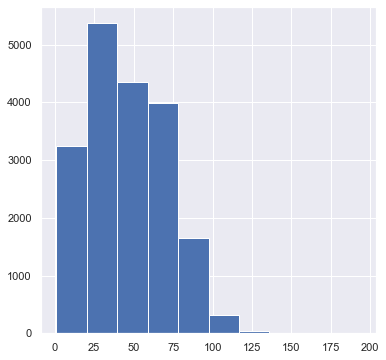

In [18]:
#word length distribution
df['word_count'].hist()

## VADER Sentiment

In [11]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shaaminig/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
#Test
sid.polarity_scores("This is an excellent car with great mileage")

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.8316}

In [22]:
words_processed_all = df['words_processed_all'].to_list()
print(words_processed_all[0])
words_processed_all[0][0]

['well', 'surprise', 'speak', 'journalist', 'back', 'september', 'come', 'number', 'other', 'go', 'well', 'result', 'poor', 'pay', 'condition', 'brexit', 'couid', 'stress', 'vaccine', 'issue', 'diversion', 'though', 'doubt', 'impact']


'['

In [14]:
import ast
new_list = []
for str_list in words_processed_all:
    a_list = ast.literal_eval(str_list)
    new_list.append(a_list)

In [15]:
len(new_list)

19000

In [17]:
new_list[0]

['well',
 'surprise',
 'speak',
 'journalist',
 'back',
 'september',
 'come',
 'number',
 'other',
 'go',
 'well',
 'result',
 'poor',
 'pay',
 'condition',
 'brexit',
 'couid',
 'stress',
 'vaccine',
 'issue',
 'diversion',
 'though',
 'doubt',
 'impact']

In [18]:
new_list[0][0]

'well'

In [19]:
all_words_df = df[['Text', 'pos_tagged_words', 'words_processed_all']].copy()

In [20]:
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                     words_processed_all  
0      ['well', 'surprise', 'speak', 'journalist', 'b...  
1                            ['fan', 'couid', 'vaccine']  
2      ['four', 'dose', 'vaccine', 'couid', 'thank', ...  
3      ['india', 'fight', 'couid', 'nineteen', 'get',...  
4      ['justjoke', 'couid', 'precautiondose', 'scien...  
...                                                  ...  
18995  ['afraid', 'infection', 'not', 'spread', 'appl...  
18996  ['wait', 'delhi', 'gujaratis', 'tamil_nada', '...  
18997  ['think', 'modi', 'pass', 'disbar', 'january',...  
18998  ['first', 'consignment', 'couid', 'nineteen', ...  
18999  ['good', 'news', 'assay', 'finally', 'couid', ...  

[19000 rows x 3 columns]

In [23]:
all_words_df['words_list'] = new_list

In [25]:
all_words_df.drop(columns = "words_processed_all", inplace = True)
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  
0      [well, surprise, speak, journalist, back, sept...  
1                                  [fan, couid, vaccine]  
2      [four, dose, vaccine, couid, thank, doctor, th...  
3      [india, fight, couid, nineteen, get, strong, i...  
4      [justjoke, couid, precautiondose, scientific, ...  
...                                                  ...  
18995  [afraid, infection, not, spread, apply, couid,...  
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...  
18997  [think, modi, pass, disbar, january, dene, lik...  
18998  [first, consignment, couid, nineteen, vaccine,...  
18999  [good, news, assay, finally, couid, vaccine, c...  

[19000 rows x 3 columns]

In [29]:
all_words_df['words_list'][0]

['well',
 'surprise',
 'speak',
 'journalist',
 'back',
 'september',
 'come',
 'number',
 'other',
 'go',
 'well',
 'result',
 'poor',
 'pay',
 'condition',
 'brexit',
 'couid',
 'stress',
 'vaccine',
 'issue',
 'diversion',
 'though',
 'doubt',
 'impact']

In [30]:
' '.join(all_words_df['words_list'][0])

'well surprise speak journalist back september come number other go well result poor pay condition brexit couid stress vaccine issue diversion though doubt impact'

In [32]:
new_col = []
all_lists = all_words_df['words_list']
for a_list in all_lists:
    new_text = ' '.join(a_list)
    new_col.append(new_text)

In [33]:
new_col

['well surprise speak journalist back september come number other go well result poor pay condition brexit couid stress vaccine issue diversion though doubt impact',
 'fan couid vaccine',
 'four dose vaccine couid thank doctor thank development partner cassette hospital general five',
 'india fight couid nineteen get strong india four crore young warrior fifteen seventeen age_group administer est dose couid nineteen vaccine indiafightscorona',
 'justjoke couid precautiondose scientific confirmation evidence ord booster dose covidvaccine effective omicron couid variant modify new vaccine formulate prevent new couid variant',
 'take third dose couid nineteen vaccine center_riya',
 'valid point voluntarily inject vaccine lead myocarditis choose avoid surely pale possibility contracting couid risk mitigate one personal habit surely ability choose trump else',
 'medicine pill treat couid vaccine way stimulate inner defense',
 'couid nineteen vaccine athlete reluctant get jab',
 'one crore p

In [34]:
all_words_df['new_text'] = new_col
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  \
0      [well, surprise, speak, journalist, back, sept...   
1                                  [fan, couid, vaccine]   
2      [four, dose, vaccine, couid, thank, doctor, th...   
3      [india, fight, couid, nineteen, get, strong, i...   
4      [justjoke, couid, precautiondose, scientific, ...   
...                                                  ...   
18995  [afraid, infection, not, spread, apply, couid,...   
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...   
18997  [think, modi, pass, disbar, january, dene, lik...   
18998  [first, consignment, couid, nineteen, vaccine,...   
18999  [good, news, assay, finally, couid, vaccine, c...   

                                                new_text  
0      well surprise speak journalist back september ...  
1                                      fan couid vaccine  
2      four dose vaccine couid thank doctor thank dev...  
3      india fight couid nineteen get strong india fo...  
4      justjoke couid precautiondose scientific confi...  
...                                                  ...  
18995  afraid infection not spread apply couid vaccin...  
18996  wait delhi gujaratis tamil_nada receive est co...  
18997  think modi pass disbar january dene like koi s...  
18998  first consignment couid nineteen vaccine covis...  
18999         good news assay finally couid vaccine come  

[19000 rows x 4 columns]

In [36]:
all_words_df['scores'] = df['new_text'].apply(lambda tweet: sid.polarity_scores(tweet))
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  \
0      [well, surprise, speak, journalist, back, sept...   
1                                  [fan, couid, vaccine]   
2      [four, dose, vaccine, couid, thank, doctor, th...   
3      [india, fight, couid, nineteen, get, strong, i...   
4      [justjoke, couid, precautiondose, scientific, ...   
...                                                  ...   
18995  [afraid, infection, not, spread, apply, couid,...   
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...   
18997  [think, modi, pass, disbar, january, dene, lik...   
18998  [first, consignment, couid, nineteen, vaccine,...   
18999  [good, news, assay, finally, couid, vaccine, c...   

                                                new_text  \
0      well surprise speak journalist back september ...   
1                                      fan couid vaccine   
2      four dose vaccine couid thank doctor thank dev...   
3      india fight couid nineteen get strong india fo...   
4      justjoke couid precautiondose scientific confi...   
...                                                  ...   
18995  afraid infection not spread apply couid vaccin...   
18996  wait delhi gujaratis tamil_nada receive est co...   
18997  think modi pass disbar january dene like koi s...   
18998  first consignment couid nineteen vaccine covis...   
18999         good news assay finally couid vaccine come   

                                                  scores  
0      {'neg': 0.269, 'neu': 0.587, 'pos': 0.144, 'co...  
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2      {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...  
3      {'neg': 0.086, 'neu': 0.828, 'pos': 0.086, 'co...  
4      {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...  
...                                                  ...  
18995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
18996  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
18997  {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...  
18998  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
18999  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...  

[19000 rows x 5 columns]

In [37]:
all_words_df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  \
0      [well, surprise, speak, journalist, back, sept...   
1                                  [fan, couid, vaccine]   
2      [four, dose, vaccine, couid, thank, doctor, th...   
3      [india, fight, couid, nineteen, get, strong, i...   
4      [justjoke, couid, precautiondose, scientific, ...   
...                                                  ...   
18995  [afraid, infection, not, spread, apply, couid,...   
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...   
18997  [think, modi, pass, disbar, january, dene, lik...   
18998  [first, consignment, couid, nineteen, vaccine,...   
18999  [good, news, assay, finally, couid, vaccine, c...   

                                                new_text  \
0      well surprise speak journalist back september ...   
1                                      fan couid vaccine   
2      four dose vaccine couid thank doctor thank dev...   
3      india fight couid nineteen get strong india fo...   
4      justjoke couid precautiondose scientific confi...   
...                                                  ...   
18995  afraid infection not spread apply couid vaccin...   
18996  wait delhi gujaratis tamil_nada receive est co...   
18997  think modi pass disbar january dene like koi s...   
18998  first consignment couid nineteen vaccine covis...   
18999         good news assay finally couid vaccine come   

                                                  scores  compound  
0      {'neg': 0.269, 'neu': 0.587, 'pos': 0.144, 'co...   -0.7650  
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2      {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...    0.7003  
3      {'neg': 0.086, 'neu': 0.828, 'pos': 0.086, 'co...    0.0000  
4      {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...    0.4939  
...                                                  ...       ...  
18995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
18996  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
18997  {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...    0.4767  
18998  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
18999  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...    0.4927  

[19000 rows x 6 columns]

In [38]:
all_words_df["compound"].value_counts()

 0.0000    7528
 0.4404     382
 0.5106     258
 0.4019     256
 0.3612     244
           ... 
-0.5233       1
 0.6692       1
 0.2212       1
 0.8006       1
 0.4289       1
Name: compound, Length: 1825, dtype: int64

In [41]:
sentiment_vader = []
for each in all_words_df["compound"]:
    if each == 0:
        sentiment_vader.append("neutral")
    elif each > 0:
        sentiment_vader.append("positive")
    else:
        sentiment_vader.append("negative")

In [42]:
all_words_df["sentiment_vader"] = sentiment_vader

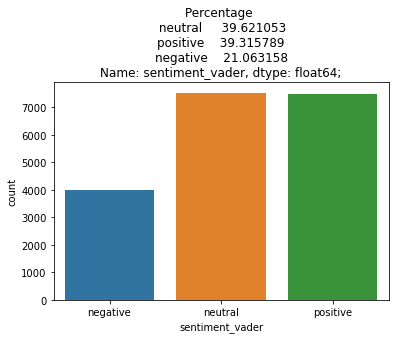

In [43]:
sns.countplot(x="sentiment_vader", data=all_words_df)
normalise_count = all_words_df['sentiment_vader'].value_counts(normalize = True)
ax = plt.title('Percentage \n {};'.format(normalise_count*100))

In [46]:
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  \
0      [well, surprise, speak, journalist, back, sept...   
1                                  [fan, couid, vaccine]   
2      [four, dose, vaccine, couid, thank, doctor, th...   
3      [india, fight, couid, nineteen, get, strong, i...   
4      [justjoke, couid, precautiondose, scientific, ...   
...                                                  ...   
18995  [afraid, infection, not, spread, apply, couid,...   
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...   
18997  [think, modi, pass, disbar, january, dene, lik...   
18998  [first, consignment, couid, nineteen, vaccine,...   
18999  [good, news, assay, finally, couid, vaccine, c...   

                                                new_text  \
0      well surprise speak journalist back september ...   
1                                      fan couid vaccine   
2      four dose vaccine couid thank doctor thank dev...   
3      india fight couid nineteen get strong india fo...   
4      justjoke couid precautiondose scientific confi...   
...                                                  ...   
18995  afraid infection not spread apply couid vaccin...   
18996  wait delhi gujaratis tamil_nada receive est co...   
18997  think modi pass disbar january dene like koi s...   
18998  first consignment couid nineteen vaccine covis...   
18999         good news assay finally couid vaccine come   

                                                  scores  compound  \
0      {'neg': 0.269, 'neu': 0.587, 'pos': 0.144, 'co...   -0.7650   
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2      {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...    0.7003   
3      {'neg': 0.086, 'neu': 0.828, 'pos': 0.086, 'co...    0.0000   
4      {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...    0.4939   
...                                                  ...       ...   
18995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18996  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18997  {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...    0.4767   
18998  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18999  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...    0.4927   

      sentiment_vader  
0            negative  
1             neutral  
2            positive  
3             neutral  
4            positive  
...               ...  
18995         neutral  
18996         neutral  
18997        positive  
18998         neutral  
18999        positive  

[19000 rows x 7 columns]

In [47]:
pos = all_words_df[all_words_df["sentiment_vader"] == "positive"]
neg = all_words_df[all_words_df["sentiment_vader"] == "negative"]
neu = all_words_df[all_words_df["sentiment_vader"] == "neutral"]

In [48]:
for each in pos.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: it was successful covid-19 vaccine campaign üëçüëç
 
Tweet: covid-19 #vaccinated today by personnel programme which helps reduce pressure national vaccine rollout. big thank you scientists, researchers healthcare professionals around world who worked tirelessly make this possible ‚Äî we are grateful #vaccineswork
 
Tweet: yeah alhamdulillah üíâ#pfizer-biontech #covid-19 vaccines has arrived malaysia. 1st batch 312,390 üíï
 


In [49]:
for each in neu.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: jb 2 1947: india received 93 cases penicillin canada. 2021: canada received 5 lakh doses covid-19 vaccines india, 15 lakh more doses be supplied soon. #ourvaccineourpride
 
Tweet: pandemic baby üëº. baby thinks everything is sanitizer üòÅ. see her reactions. #covid19 #covidvaccine
 
Tweet: aiims director dr. randeep guleria receives covid-19 #vaccine at aiims, delhi. #largestvaccinedrive #vaccineforindia
 


In [50]:
for each in neg.sample(n=3)["Text"]:
    print("Tweet: " + each)
    print(" ")

Tweet: #indiafightscorona: üìçsymptomatic pregnant women are at increased risk severe diseases it might affect foetus too. hence, covid-19 vaccine is recommended pregnant women. ‚úÖ continue following #covidappropriatebehaviour #we4vaccine #unite2fightcorona
 
Tweet: new zealand has reported what it believes be its first death linked pfizer covid-19 vaccine. #newzealand #covid19 #pfizer
 
Tweet: this time no need discuss opnion poll now time show actual news related covid government guidelines also they need do awareness about vaccine as well. those who all are discussing election they are useless.
 


In [51]:
all_words_df

Text  \
0      well this is no surprise, i spoke about this j...   
1                            faqs about #covid #vaccines   
2      4 dose vaccine against covid thanks doctor tha...   
3      india's fight against covid-19 is getting stro...   
4      #justasking #covid #precautiondose is there an...   
...                                                  ...   
18995  i am afraid that infection will not spread whi...   
18996  wait is now over: delhi, gujarat, tamil nadu r...   
18997  i think, modi ji k paas issbar 26 january pr d...   
18998  first #consignment #covid-19 vaccine, #covishi...   
18999  very good news assam finally covid vaccine is ...   

                                        pos_tagged_words  \
0      [('well', 'RB'), ('this', 'DT'), ('is', 'VBZ')...   
1      [('fans', 'NNS'), ('about', 'IN'), ('couid', '...   
2      [('four', 'CD'), ('dose', 'JJ'), ('vaccine', '...   
3      [('india', 'NN'), ('i', 'NN'), ('fight', 'NN')...   
4      [('justjoking', 'VBG'), ('couid', 'NN'), ('pre...   
...                                                  ...   
18995  [('i', 'NN'), ('am', 'VBP'), ('afraid', 'JJ'),...   
18996  [('wait', 'NN'), ('is', 'VBZ'), ('now', 'RB'),...   
18997  [('i', 'NN'), ('think', 'VBP'), ('modi', 'IN')...   
18998  [('first', 'RB'), ('consignment', 'JJ'), ('cou...   
18999  [('very', 'RB'), ('good', 'JJ'), ('news', 'NN'...   

                                              words_list  \
0      [well, surprise, speak, journalist, back, sept...   
1                                  [fan, couid, vaccine]   
2      [four, dose, vaccine, couid, thank, doctor, th...   
3      [india, fight, couid, nineteen, get, strong, i...   
4      [justjoke, couid, precautiondose, scientific, ...   
...                                                  ...   
18995  [afraid, infection, not, spread, apply, couid,...   
18996  [wait, delhi, gujaratis, tamil_nada, receive, ...   
18997  [think, modi, pass, disbar, january, dene, lik...   
18998  [first, consignment, couid, nineteen, vaccine,...   
18999  [good, news, assay, finally, couid, vaccine, c...   

                                                new_text  \
0      well surprise speak journalist back september ...   
1                                      fan couid vaccine   
2      four dose vaccine couid thank doctor thank dev...   
3      india fight couid nineteen get strong india fo...   
4      justjoke couid precautiondose scientific confi...   
...                                                  ...   
18995  afraid infection not spread apply couid vaccin...   
18996  wait delhi gujaratis tamil_nada receive est co...   
18997  think modi pass disbar january dene like koi s...   
18998  first consignment couid nineteen vaccine covis...   
18999         good news assay finally couid vaccine come   

                                                  scores  compound  \
0      {'neg': 0.269, 'neu': 0.587, 'pos': 0.144, 'co...   -0.7650   
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
2      {'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...    0.7003   
3      {'neg': 0.086, 'neu': 0.828, 'pos': 0.086, 'co...    0.0000   
4      {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compou...    0.4939   
...                                                  ...       ...   
18995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18996  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18997  {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...    0.4767   
18998  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   
18999  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...    0.4927   

      sentiment_vader  
0            negative  
1             neutral  
2            positive  
3             neutral  
4            positive  
...               ...  
18995         neutral  
18996         neutral  
18997        positive  
18998         neutral  
18999        positive  

[19000 rows x 7 columns]

In [52]:
all_words_df.to_csv("labelled_india.csv", index = False)